In [1]:
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

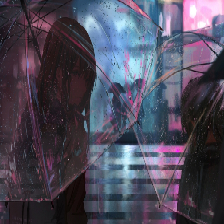

In [4]:
#前期准备
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext
from pathlib import Path



def opF(path):
    p = Path(path)

#引入模型
model = tf.keras.applications.mobilenet.MobileNet()

#图像进行预处理
women_image_id = os.listdir('Images/women')[0]
women_path = os.path.join('Images/women',women_image_id)
women_image = load_image(women_path)

tf.keras.preprocessing.image.load_img(women_path, target_size=(224,224))

sight_image_id = os.listdir('Images/sight')[0]
sight_path = os.path.join('Images/sight',sight_image_id)
sight_image = load_image(sight_path)

tf.keras.preprocessing.image.load_img(sight_path, target_size=(224,224))

car_image_id = os.listdir('Images/car')[0]
car_path = os.path.join('Images/car',car_image_id)
car_image = load_image(car_path)

tf.keras.preprocessing.image.load_img(car_path, target_size=(224,224))

comic_image_id = os.listdir('Images/comic')[0]
comic_path = os.path.join('Images/comic',comic_image_id)
comic_image = load_image(comic_path)

tf.keras.preprocessing.image.load_img(comic_path, target_size=(224,224))


In [5]:
#切掉最后三步
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

#重构模型
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

#最后三层的独立
for layer in model.layers[:-3]:
    layer.trainable = False

#调整优化
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

17225924/17225924 [==============================] - 2s 0us/step


In [6]:
#资料处理
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 2033 images belonging to 4 classes.
Found 225 images belonging to 4 classes.


In [7]:
#设定容量
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=6,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/6
63/63 [==============================] - 67s 1s/step - loss: 0.8241 - val_loss: 0.4420
Epoch 2/6
63/63 [==============================] - 58s 923ms/step - loss: 0.3866 - val_loss: 0.3777
Epoch 3/6
63/63 [==============================] - 58s 924ms/step - loss: 0.3303 - val_loss: 0.3798
Epoch 4/6
63/63 [==============================] - 58s 921ms/step - loss: 0.2923 - val_loss: 0.3257
Epoch 5/6
63/63 [==============================] - 58s 924ms/step - loss: 0.2670 - val_loss: 0.3491
Epoch 6/6
63/63 [==============================] - 58s 925ms/step - loss: 0.2488 - val_loss: 0.3221


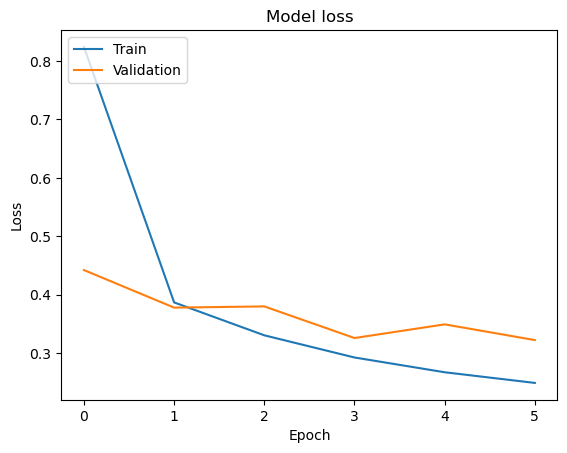

In [8]:
#验证稳定
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
#识别图像
random_women = random.choice(os.listdir('Images/women'))
women_path = os.path.join('Images/women',random_women)
women = load_image(women_path)
random_sight = random.choice(os.listdir('Images/sight'))
sight_path = os.path.join('Images/sight',random_sight)
sight = load_image(sight_path)
random_car = random.choice(os.listdir('Images/car'))
car_path = os.path.join('Images/car',random_car)
car = load_image(car_path)
random_comic = random.choice(os.listdir('Images/comic'))
comic_path = os.path.join('Images/comic',random_comic)
comic = load_image(comic_path)

#选择图像
tf.keras.preprocessing.image.load_img(women_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(sight_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(car_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(comic_path, target_size=(224,224))

print(f'''women:{np.round(model.predict(women),4)}''')
print(f'''sight:{np.round(model.predict(sight),4)}''')
print(f'''car:{np.round(model.predict(car),4)}''')
print(f'''comic:{np.round(model.predict(comic),4)}''')

1/1 [==============================] - 0s 280ms/step
women:[[0.000e+00 1.410e-02 1.000e-04 9.858e-01]]
1/1 [==============================] - 0s 23ms/step
sight:[[0.000e+00 1.000e-04 9.998e-01 0.000e+00]]
1/1 [==============================] - 0s 26ms/step
car:[[1. 0. 0. 0.]]
1/1 [==============================] - 0s 25ms/step
comic:[[0.0607 0.8836 0.0162 0.0395]]


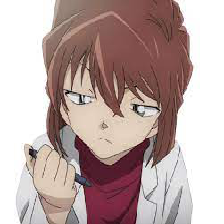

In [10]:
haibara_path = 'Images/haibara.jfif'
haibara = load_image(haibara_path)
tf.keras.preprocessing.image.load_img(haibara_path, target_size=(224,224))

In [12]:
print(f'''haibara:{np.round(model.predict(haibara),2)}''')

1/1 [==============================] - 0s 26ms/step
haibara:[[0. 1. 0. 0.]]
